# Sequence Analysis of "Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome"

## ID : NC_045512.2

## NCBI link: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta&log$=seqview

# Outline: 

## -> Reading

## -> Sequence Analysis
      
      Frequency of Nucleotides and Amino Acids, GC and AT content

## -> Protein Synthesis

In [11]:
import Bio

## Reading

In [12]:
#Read FASTA file
covid_record = SeqIO.read("covid_19_NC_045512.2.fasta", format = "fasta")

In [18]:
#Extract Sequence
covid_dna = covid_record.seq
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [15]:
length_of_covid_19 = len(covid_dna)
length_of_covid_19

29903

In [17]:
#Transcribe DNA to mRNA
covid_mrna = covid_dna.transcribe() 
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [122]:
#Translate mRNA to Protein
covid_amino_acids = covid_mrna.translate()
covid_amino_acids

C:\Users\18687\AppData\Local\Programs\Python\Python39\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

## Sequence Analysis

In [26]:
#Checking for nucleotide/base frequency
from collections import Counter
covid_n_counts = Counter(covid_dna)
covid_n_counts

Counter({'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492})

<BarContainer object of 4 artists>

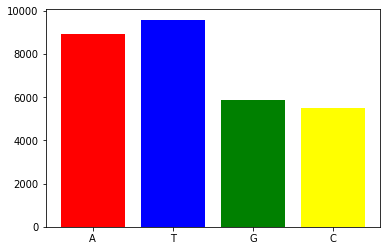

In [29]:
#Plot the frequency distribution
import matplotlib.pyplot as plt
plt.bar(covid_n_counts.keys(), covid_n_counts.values(), color = ["red","blue","green","yellow"])

In [123]:
#Check for amino acid frequency and 5 common ones
covid_aa_frq = Counter(covid_amino_acids)
print(covid_aa_frq)
print('\n')
print(Counter(covid_amino_acids).most_common(5))

Counter({'L': 886, 'S': 810, '*': 774, 'T': 679, 'C': 635, 'F': 593, 'R': 558, 'V': 548, 'Y': 505, 'N': 472, 'I': 436, 'K': 413, 'G': 394, 'A': 375, 'H': 332, 'Q': 325, 'P': 292, 'D': 290, 'E': 270, 'W': 263, 'M': 117})


[('L', 886), ('S', 810), ('*', 774), ('T', 679), ('C', 635)]


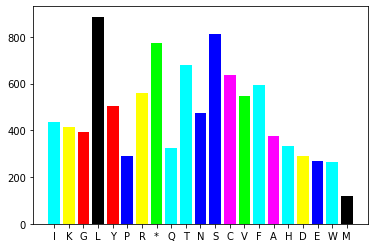

In [119]:
#Plot amino acid frequency
import random
import numpy as np
l = []

for i in range(0, len(covid_aa_frq)+1):
    l.append(tuple(np.random.choice(range(0, 2), size=3)))
    
amino_acid_plot = plt.bar(covid_aa_frq.keys(), covid_aa_frq.values(),  color = l)


In [134]:
#Find 10 longest sequence of an amino acid before stop codon (*)
covid_no_stop_codons = covid_amino_acids.split('*')
covid_no_stop_codons = [str(i) for i in covid_no_stop_codons]
covid_no_stop_codons

import pandas as pd 
df = pd.DataFrame({"amino_acids": covid_no_stop_codons})
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df)
print(df)

                                     amino_acids
0                                       IKGLYLPR
1                                  QTNQLSISCRSVL
2                                 TNFKICVAVTRLHA
3                                          CTHAV
4                                        LITNYCR
..                                           ...
770                              SHIAIFNQCVTLGRT
771  KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM
772                                            F
773                                             
774                             LLRRMTKKKKKKKKKK

[775 rows x 1 columns]


In [131]:
df['count'] = df['amino_acids'].str.len()
df.nlargest(10,'count')

,amino_acids,count
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
6,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
464,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
539,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
758,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
771,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43


In [110]:
#Check for Molecular Weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

#for stop codon errors:
#molecular_weight(str(covid_dna).replace('N',''))

9241219.214400413

In [34]:
#GC and AT content indicates how stable the protein is. 
# Higher GC means more stability due to triple bonds forming. 

#GC count 
from Bio.SeqUtils import GC,GC123,GC_skew

In [36]:
gc_content = GC(covid_dna)
gc_content
#This number is relatively small, indicating it may be a weaker protein with a lower melting point
#This however allows allows easier PCR amplification due to ease of designing primer long enough to provide higher specificty

37.97277865097148

In [48]:
# def at_content(seq):
#     return float(seq.count("A") + seq.count("T")) / len(seq) * 100

at_content = (lambda x: float(x.count("A") + x.count("T")) / len(x) * 100)

at_content(covid_dna)
at_content = int(at_content(covid_dna))

In [55]:
#Count is correct if gc and at tally to 100
gc_content + at_content # - 100

#The lost amount (0.027221349028522468) is most likely due to the presence of stop codons


99.97277865097148

In [52]:
#GC Skew to locate leading and lagging strand
GC_skew(covid_dna, window = 100)

In [53]:
#Determine melting point -- expect to be low due to low gc content
from Bio.SeqUtils import MeltingTemp as mt

mt.Tm_GC(covid_dna)

75.20366663587967